# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [2]:
#A= Cookie is from bowl1
#B = Cookie is vanilla flavored
#P(A|B)=P(B|A)P(A)/P(B)
#P(B|A)P(A)=(3/4)*(1/2)
#P(B)=5/8
proba1=((3/4)*(1/2))/(5/8)
print(f'Probability of cookie being from bowl 1 given it is vanilla:{round(proba1*100,2)}%')

Probability of cookie being from bowl 1 given it is vanilla:60.0%


What is the probability that it came from Bowl 2?

In [3]:
#C= Cookie is from bowl2=A^c
#P(C|B)=P(A^c|B)=1-P(A|B)
proba2=1-proba1
print(f'Probability of cookie being from bowl 2 given it is vanilla:{round(proba2*100,2)}%')

Probability of cookie being from bowl 2 given it is vanilla:40.0%


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [4]:
#D=Cookie is chocolate flavored
##P(A|D)=P(D|A)P(A)/P(D)
#P(D|A)P(A)=(1/4)*(1/2)
#P(D)=3/8
proba3=((1/4)*(1/2))/(3/8)
print(f'Probability of cookie being from bowl 1 given it is chocolate:{round(proba3*100,2)}%')

Probability of cookie being from bowl 1 given it is chocolate:33.33%


In [5]:
##P(C|D)=P(A^c|D)=1-P(A|D)
proba4=1-proba3
print(f'Probability of cookie being from bowl 2 given it is chocolate:{round(proba4*100,2)}%')

Probability of cookie being from bowl 2 given it is chocolate:66.67%


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [6]:
def teo_bayes(aprioris,likelihoods):
    norm=sum(np.multiply(aprioris,likelihoods))
    aposteriori=(np.divide(np.multiply(aprioris,likelihoods),norm))
    return aposteriori

In [7]:
aprioris=[0.5,0.5]
likelihoods=[0.2*0.2,0.14*0.1]
respuesta1=teo_bayes(aprioris,likelihoods)
# First is prob that yellow candy came from Bag 1 second is that it came from Bag 2
respuesta1

array([0.74074074, 0.25925926])

In [8]:
#Consideremos los siguientes eventos
#A = el dulce 1 es de la bolsa 1
#B = de los 2 dulces tomados el 1 es amarillo y el 2 es verde
#C= el dulce 1 es amarillo
#D= el dulce 2 es verde
#E= el dulce 1 es de la bolsa 2 = A^c

#P(A|B)=P(B|A)P(A)/P(B)

#P(B|A)= P(C∩D|A)=P(C|A)P(D|A)=(20/100)*(20/100)=1/25
#P(A)= 1/2
#P(B)=P(B|A)P(A)+P(B|E)P(E)=P(C∩D|A)P(A)+P(C∩D|E)P(E)=1/2(P(C|A)P(D|A)+P(C|E)P(D|E))=1/2(1/25+(14/100)*(10/100))
#=1/2(1/25+14/1000)=1/2(1/25+7/500)
#P(A|B)=((1/25)*(1/2))/((1/2)*(1/25+7/500))=(1/25)/(1/25+7/500)
proba5=(1/25)/(1/25+7/500)
print(f'Probability that yellow candy came from Bag 1:{round(proba5*100,2)}%')

Probability that yellow candy came from Bag 1:74.07%


What is the probability that the yellow candy came from Bag 2?

In [9]:
#P(E|B)=P(A^c|B)=1-P(A|B)
proba6=1-proba5
print(f'Probability that yellow candy came from Bag 2:{round(proba6*100,2)}%')

Probability that yellow candy came from Bag 2:25.93%


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [10]:
#F= el dulce 2 es de la bolsa 2=A
#P(F^c|B)=P(A^c|B)=1-P(A|B)=
print(f'Probability that green candy came from Bag 1:{round(proba6*100,2)}%')

Probability that green candy came from Bag 1:25.93%


In [11]:
#P(F|B)=P(A|B)
print(f'Probability that green candy came from Bag 2:{round(proba5*100,2)}%')

Probability that green candy came from Bag 2:74.07%


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [12]:
aprioris=[1/3,1/3,1/3]
likelihoods=[0.5,0,1]
respuesta2=teo_bayes(aprioris,likelihoods)
#First is prob that price is behind door A, second is that it is behind door B (0) and third is prob that it is behind door C
respuesta2

array([0.33333333, 0.        , 0.66666667])

In [13]:
# A = Premio en la puerta A
# B = Host abre puera B
# C = Premio en puerta B
# D = Premio en puerta C
#P(A|B) = (P(B|A)*P(A)) / P(B)
#P(B|A)*P(A) = (1/2*1/3)
#P(B)= P(B|A)P(A) + P(B|C)P(C) + P(B|D)P(D)
#P(B)= (0.5*1/3) + (0*1/3)  +  (1*1/3)
Price_inA = ((1/2)*(1/3)) / ((0.5*1/3) + (0*1/3)  +  (1*1/3))
print(f'Probability car being behind door A:{round(Price_inA*100,2)}%')

Probability car being behind door A:33.33%


In [14]:
#P(C|B) = (P(B|C)*P(C)) / P(B)
#P(B|C)*P(C) = (1*1/3)
#P(B)= P(B|A)P(A) + P(B|C)P(C) + P(B|D)P(D)
#P(B)= (0.5*1/3) + (0*1/3)  +  (1*1/3)
Price_inC = (1*1/3) / ((0.5*1/3) + (0*1/3)  +  (1*1/3))
print(f'Probability car being behind door C:{round(Price_inC*100,2)}%')

Probability car being behind door C:66.67%


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

In [15]:
#Generate random uniform sample (random probability to buy)
prior = pd.Series(np.random.uniform(0, 1, size=100000))

In [16]:
#Make function that return expected buyers for probability of buying given and 100 visitors
def generative_model(param):
    result = np.random.binomial(100, param)
    return result

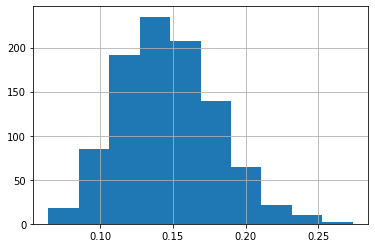

In [17]:
#For each probability on prior lets generate a sample of size 1 of the number of buyers given 100 visitors and save on sim_data
sim_data = list()

for p in prior:
    sim_data.append(generative_model(p))
    
#We compare each sample, keep the ones that returned expected number of buyers (14) and get prior probabilities
posterior = prior[list(map(lambda x: x == 14, sim_data))]
#Plot distribution of porbabilities that returned 14 real buyers
posterior.hist()
plt.show()

Produce a set of descriptive statistics for the posterior distribution.

In [18]:
posterior.describe()

count    973.000000
mean       0.146503
std        0.033411
min        0.064502
25%        0.122823
50%        0.144348
75%        0.168154
max        0.273596
dtype: float64

What is the 90% credible interval range?

In [19]:
#Between 0.05 and .95 of data
print(posterior.quantile(.05), '|', posterior.quantile(.95))

0.09466871173183515 | 0.20475203599837982


What is the Maximum Likelihood Estimate?

In [20]:
#Keep 2 decimals to get integer value probabilities (xx% instead of xx.xxx%)
rounded = posterior.round(2)
#Get mode (keep first one)
mode = rounded.mode()[0]
#Probability of getting the mode (mode)
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|',probability)

Maximum Likelihood Estimate:  0.14 | 0.12538540596094552


In [24]:
pd.Series([1,1,0,2,2]).mode()

0    1
1    2
dtype: int64